___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___

## Business Problem



This project aims to implement Multi-Class Classification algorithms for ***Tree Types Prediction***. In this project, EDA processes, handling outliers and feature engineering will be implemented to make the data ready for ML algorithms. For feature engineering, ***sqlite3*** library will be used. 

Forest Cover type dataset in the UCI Machine Learning Repository that takes forestry data from four wilderness areas in Roosevelt National Forest in Northern Colorado will be used.

Dataset contains tree observations from four areas of one national forest district. This dataset includes information on tree type, shadow coverage, distance to nearby landmarks, soil type, and local topography. The goal of the project is to build a model that predicts what types of trees grow in an area.

***The Forest Dataset*** contains approximately 600 thousand lines, also you can easily find many information about it on the web (especially Kaggle).

Description of variables are as follows;

* Elevation - Elevation in meters 
* Aspect - Aspect in degrees azimuth 
* Slope - Slope in degrees 
* Horizontal_Distance_To_Hydrology - Horz Dist to nearest surface water features 
* Vertical_Distance_To_Hydrology - Vert Dist to nearest surface water features 
* Horizontal_Distance_To_Roadways - Horz Dist to nearest roadway 
* Hillshade_9am (0 to 255 index) - Hillshade index at 9am, summer solstice 
* Hillshade_Noon (0 to 255 index) - Hillshade index at noon, summer solstice 
* Hillshade_3pm (0 to 255 index) - Hillshade index at 3pm, summer solstice 
* Horizontal_Distance_To_Fire_Points - Horz Dist to nearest wildfire ignition points 
* Wilderness_Area (4 binary columns, 0 = absence or 1 = presence) - Wilderness area designation 
* Soil_Type (40 binary columns, 0 = absence or 1 = presence) - Soil Type designation 
* Cover_Type (7 types, integers 1 to 7) - Forest Cover Type designation


***Decision Tree,  Random Forest, XGBoost*** and ***LightGBM*** algorithms will be implemented. Also, the success of the models will be evaluated with appropriate performance metrics. For visualization, ***Yellowbrick, Seaborn*** or ***Matplotlib*** modules will be used.



## Exploratory Data Analysis

### Import Libraries, Load Dataset, Exploring Data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sqlalchemy import create_engine
import warnings
from IPython.core.pylabtools import figsize
from scipy.stats import zscore
from scipy import stats
from numpy import percentile
font_title = {'family': 'times new roman', 'color': 'darkred',
              'weight': 'bold', 'size': 14}
warnings.filterwarnings('ignore')
sns.set_style("whitegrid")
plt.rcParams['figure.dpi'] = 100

### Load Dataset

In [2]:
df = pd.read_csv('covtype.csv')
df.head()

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,...,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Cover_Type
0,2596,51,3,258,0,510,221,232,148,6279,...,0,0,0,0,0,0,0,0,0,5
1,2590,56,2,212,-6,390,220,235,151,6225,...,0,0,0,0,0,0,0,0,0,5
2,2804,139,9,268,65,3180,234,238,135,6121,...,0,0,0,0,0,0,0,0,0,2
3,2785,155,18,242,118,3090,238,238,122,6211,...,0,0,0,0,0,0,0,0,0,2
4,2595,45,2,153,-1,391,220,234,150,6172,...,0,0,0,0,0,0,0,0,0,5


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 581012 entries, 0 to 581011
Data columns (total 55 columns):
 #   Column                              Non-Null Count   Dtype
---  ------                              --------------   -----
 0   Elevation                           581012 non-null  int64
 1   Aspect                              581012 non-null  int64
 2   Slope                               581012 non-null  int64
 3   Horizontal_Distance_To_Hydrology    581012 non-null  int64
 4   Vertical_Distance_To_Hydrology      581012 non-null  int64
 5   Horizontal_Distance_To_Roadways     581012 non-null  int64
 6   Hillshade_9am                       581012 non-null  int64
 7   Hillshade_Noon                      581012 non-null  int64
 8   Hillshade_3pm                       581012 non-null  int64
 9   Horizontal_Distance_To_Fire_Points  581012 non-null  int64
 10  Wilderness_Area1                    581012 non-null  int64
 11  Wilderness_Area2                    581012 non-null 

In [4]:
df.shape

(581012, 55)

In [5]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Elevation,581012.0,2959.365301,279.984734,1859.0,2809.0,2996.0,3163.0,3858.0
Aspect,581012.0,155.656807,111.913721,0.0,58.0,127.0,260.0,360.0
Slope,581012.0,14.103704,7.488242,0.0,9.0,13.0,18.0,66.0
Horizontal_Distance_To_Hydrology,581012.0,269.428217,212.549356,0.0,108.0,218.0,384.0,1397.0
Vertical_Distance_To_Hydrology,581012.0,46.418855,58.295232,-173.0,7.0,30.0,69.0,601.0
Horizontal_Distance_To_Roadways,581012.0,2350.146611,1559.254870,0.0,1106.0,1997.0,3328.0,7117.0
Hillshade_9am,581012.0,212.146049,26.769889,0.0,198.0,218.0,231.0,254.0
Hillshade_Noon,581012.0,223.318716,19.768697,0.0,213.0,226.0,237.0,254.0
Hillshade_3pm,581012.0,142.528263,38.274529,0.0,119.0,143.0,168.0,254.0
Horizontal_Distance_To_Fire_Points,581012.0,1980.291226,1324.195210,0.0,1024.0,1710.0,2550.0,7173.0


In [6]:
# Detect Number of Unique values of each column
df.apply(lambda x: x.nunique())

Elevation                             1978
Aspect                                 361
Slope                                   67
Horizontal_Distance_To_Hydrology       551
Vertical_Distance_To_Hydrology         700
Horizontal_Distance_To_Roadways       5785
Hillshade_9am                          207
Hillshade_Noon                         185
Hillshade_3pm                          255
Horizontal_Distance_To_Fire_Points    5827
Wilderness_Area1                         2
Wilderness_Area2                         2
Wilderness_Area3                         2
Wilderness_Area4                         2
Soil_Type1                               2
Soil_Type2                               2
Soil_Type3                               2
Soil_Type4                               2
Soil_Type5                               2
Soil_Type6                               2
Soil_Type7                               2
Soil_Type8                               2
Soil_Type9                               2
Soil_Type10

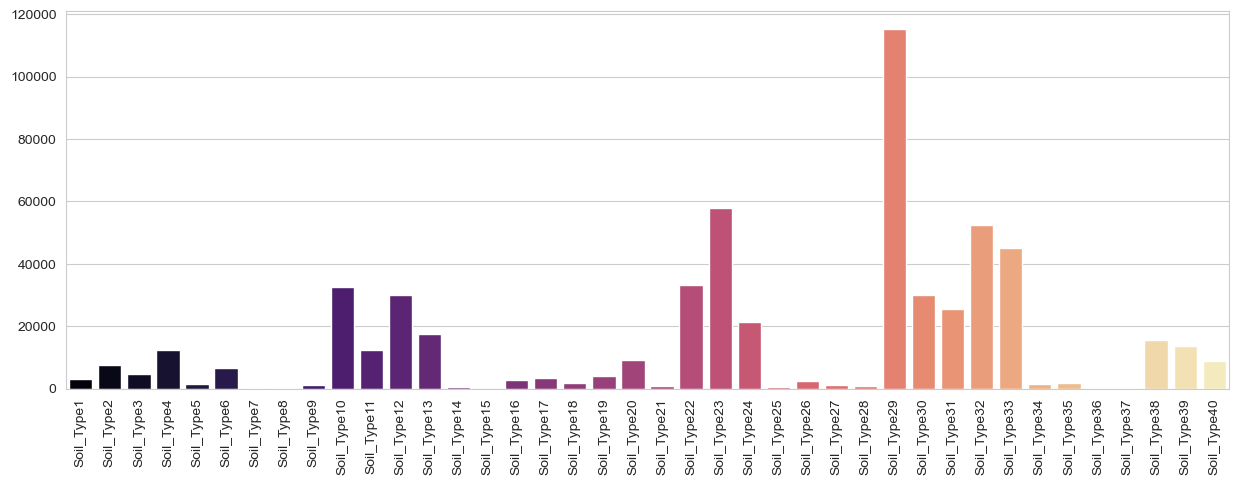

In [7]:
soil = df[df.columns[14:54]] 
fig, ax = plt.subplots(figsize=(16,8))
sns.barplot(x=soil.columns ,y=[soil[i].value_counts()[1] for i in soil.columns], palette = 'magma')
plt.xticks(rotation=90);

In [8]:
# Looking at the Target Variable (Cover_Type)
df.Cover_Type.value_counts()

2    283301
1    211840
3     35754
7     20510
6     17367
5      9493
4      2747
Name: Cover_Type, dtype: int64

## Data Preprocessing

### Detect Missing Values and Outliers

#### Missing Value Detection

In [9]:
df.isnull().sum().any()

False

#### Outlier Detection


In [10]:
features = df.loc[:,'Elevation':'Horizontal_Distance_To_Fire_Points']
features

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points
0,2596,51,3,258,0,510,221,232,148,6279
1,2590,56,2,212,-6,390,220,235,151,6225
2,2804,139,9,268,65,3180,234,238,135,6121
3,2785,155,18,242,118,3090,238,238,122,6211
4,2595,45,2,153,-1,391,220,234,150,6172
...,...,...,...,...,...,...,...,...,...,...
581007,2396,153,20,85,17,108,240,237,118,837
581008,2391,152,19,67,12,95,240,237,119,845
581009,2386,159,17,60,7,90,236,241,130,854
581010,2384,170,15,60,5,90,230,245,143,864


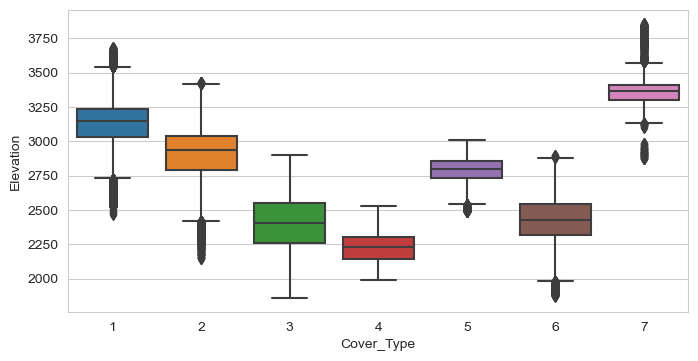

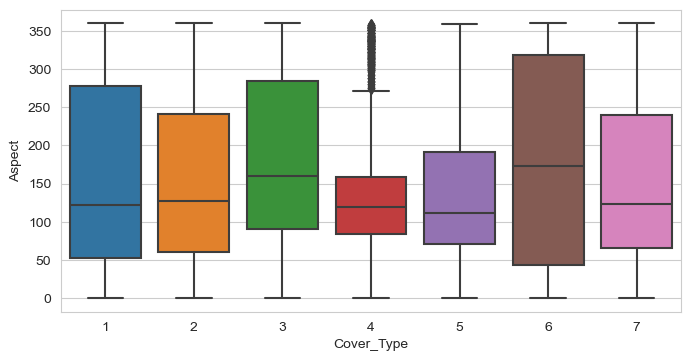

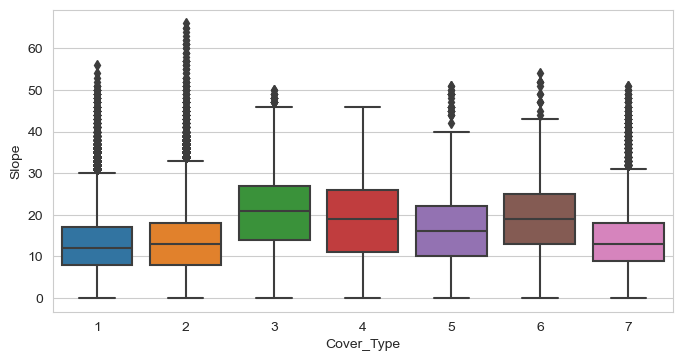

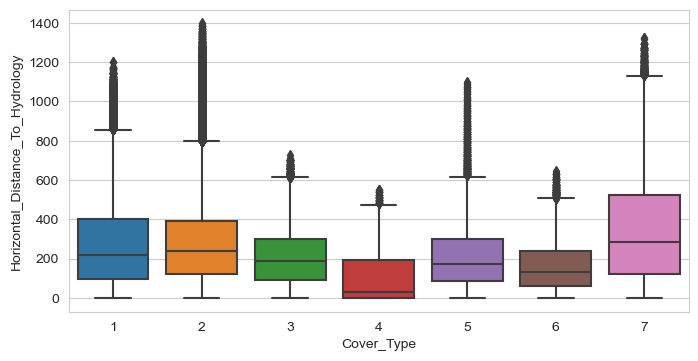

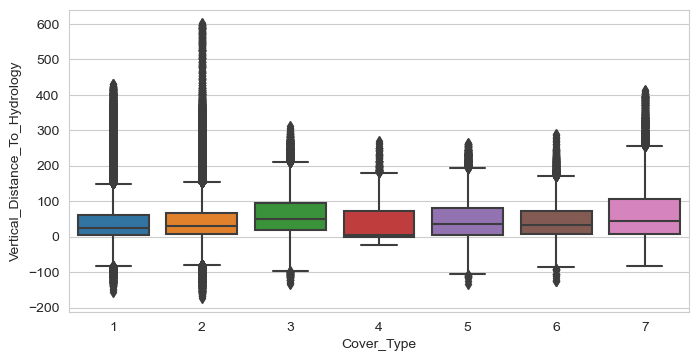

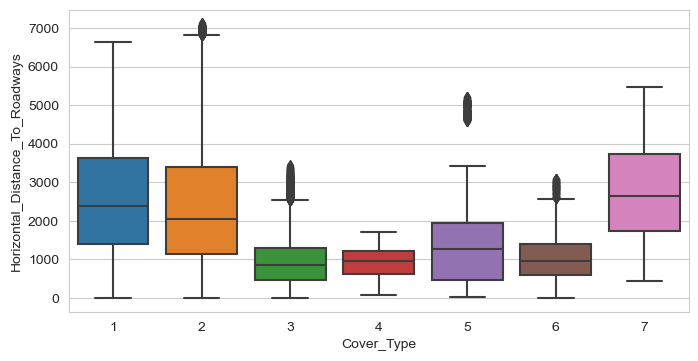

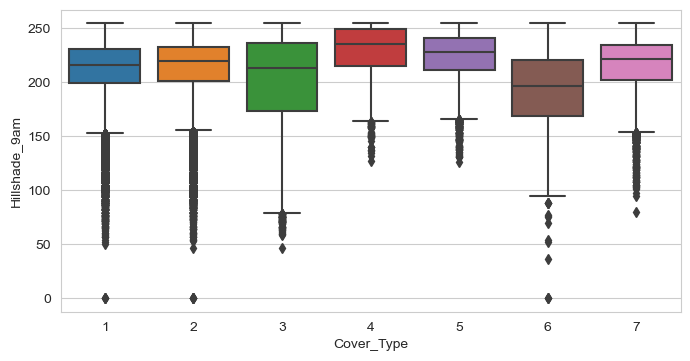

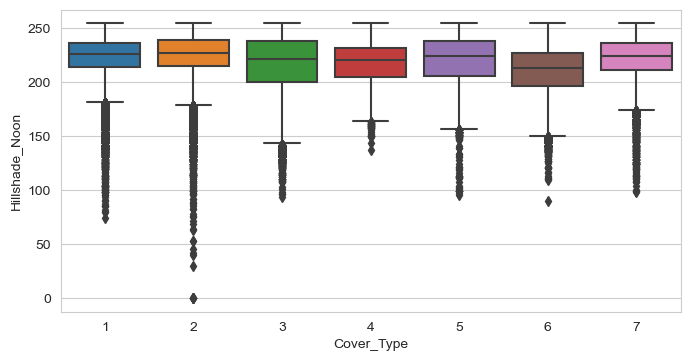

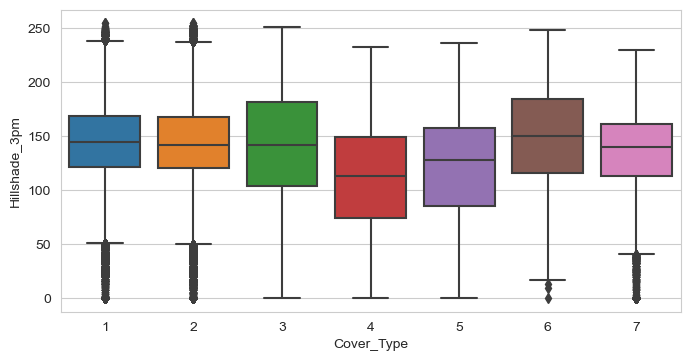

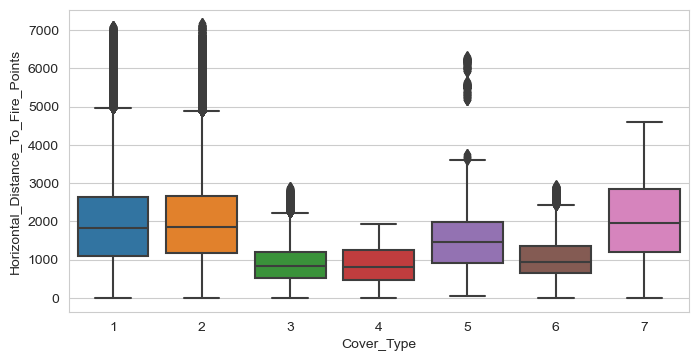

In [11]:
for i in features.columns:
    plt.figure(i,figsize=(12,8))
    sns.boxplot(x=df['Cover_Type'], y=features[i], data=df);

In [12]:
# this function detects outliers based on 3 time IQR and returns the number of lower and uper limit and number of outliers respectively
   
def detect_outliers(df, col_name):
    first_quartile = np.percentile(np.array(df[col_name].tolist()), 25)
    third_quartile = np.percentile(np.array(df[col_name].tolist()), 75)
    IQR = third_quartile - first_quartile
                      
    upper_limit = third_quartile+(3*IQR)
    lower_limit = first_quartile-(3*IQR)
    outlier_count = 0
                      
    for value in df[col_name].tolist():
        if (value < lower_limit) | (value > upper_limit):
            outlier_count +=1
    return lower_limit, upper_limit, outlier_count

In [13]:
for col in features:
    if detect_outliers(df, col)[2] > 0:
        print("There are {} outliers in {}".format(detect_outliers(df, col)[2], col))

There are 275 outliers in Slope
There are 414 outliers in Horizontal_Distance_To_Hydrology
There are 5339 outliers in Vertical_Distance_To_Hydrology
There are 1027 outliers in Hillshade_9am
There are 1191 outliers in Hillshade_Noon
There are 10 outliers in Horizontal_Distance_To_Fire_Points


#### Dealing with Outliers

In [14]:
df1 = df[(df['Slope'] > detect_outliers(df, 'Slope')[0]) & (df['Slope'] < detect_outliers(df, 'Slope')[1])]

In [15]:
df2 = df1[(df1['Horizontal_Distance_To_Fire_Points'] > detect_outliers(df1, 'Horizontal_Distance_To_Fire_Points')[0]) &
              (df1['Horizontal_Distance_To_Fire_Points'] < detect_outliers(df1, 'Horizontal_Distance_To_Fire_Points')[1])]

In [16]:
df3 = df2[(df2['Horizontal_Distance_To_Hydrology'] > detect_outliers(df2, 'Horizontal_Distance_To_Hydrology')[0]) &
              (df2['Horizontal_Distance_To_Hydrology'] < detect_outliers(df2, 'Horizontal_Distance_To_Hydrology')[1])]

In [17]:
df4 = df3[(df3['Vertical_Distance_To_Hydrology'] > detect_outliers(df3, 'Vertical_Distance_To_Hydrology')[0]) &
              (df3['Vertical_Distance_To_Hydrology'] < detect_outliers(df3, 'Vertical_Distance_To_Hydrology')[1])]

In [18]:
df5 = df4[(df4['Hillshade_9am'] > detect_outliers(df4, 'Hillshade_9am')[0]) &
              (df4['Hillshade_9am'] < detect_outliers(df4, 'Hillshade_9am')[1])]

In [19]:
df6 = df5[(df5['Hillshade_Noon'] > detect_outliers(df5, 'Hillshade_Noon')[0]) &
              (df5['Hillshade_Noon'] < detect_outliers(df5, 'Hillshade_Noon')[1])]

In [20]:
df_final = df6.reset_index(drop= True)

In [21]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 572789 entries, 0 to 572788
Data columns (total 55 columns):
 #   Column                              Non-Null Count   Dtype
---  ------                              --------------   -----
 0   Elevation                           572789 non-null  int64
 1   Aspect                              572789 non-null  int64
 2   Slope                               572789 non-null  int64
 3   Horizontal_Distance_To_Hydrology    572789 non-null  int64
 4   Vertical_Distance_To_Hydrology      572789 non-null  int64
 5   Horizontal_Distance_To_Roadways     572789 non-null  int64
 6   Hillshade_9am                       572789 non-null  int64
 7   Hillshade_Noon                      572789 non-null  int64
 8   Hillshade_3pm                       572789 non-null  int64
 9   Horizontal_Distance_To_Fire_Points  572789 non-null  int64
 10  Wilderness_Area1                    572789 non-null  int64
 11  Wilderness_Area2                    572789 non-null 

In [22]:
df_final.head()

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,...,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Cover_Type
0,2596,51,3,258,0,510,221,232,148,6279,...,0,0,0,0,0,0,0,0,0,5
1,2590,56,2,212,-6,390,220,235,151,6225,...,0,0,0,0,0,0,0,0,0,5
2,2804,139,9,268,65,3180,234,238,135,6121,...,0,0,0,0,0,0,0,0,0,2
3,2785,155,18,242,118,3090,238,238,122,6211,...,0,0,0,0,0,0,0,0,0,2
4,2595,45,2,153,-1,391,220,234,150,6172,...,0,0,0,0,0,0,0,0,0,5


#### Looking at the target variable (Cover_Type)

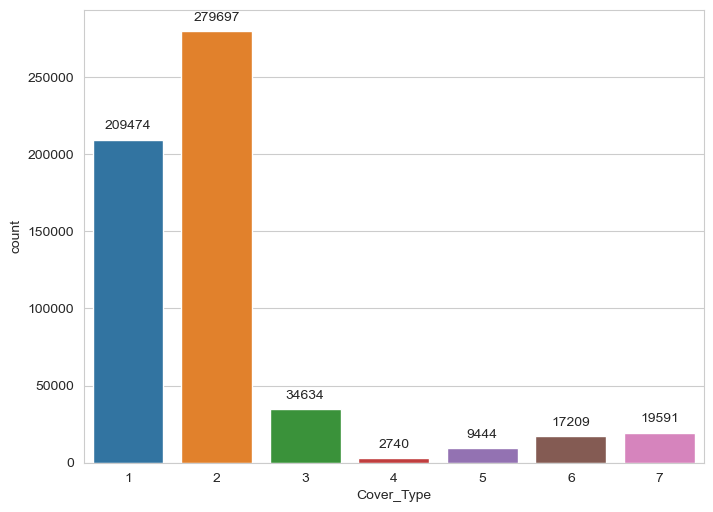

In [23]:
plt.figure(figsize=(8, 6))
vizz=sns.countplot('Cover_Type',data=df_final)
for p in vizz.patches:
    vizz.annotate(format(p.get_height(), '.0f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')

#### Looking at the correlation between the continious variables

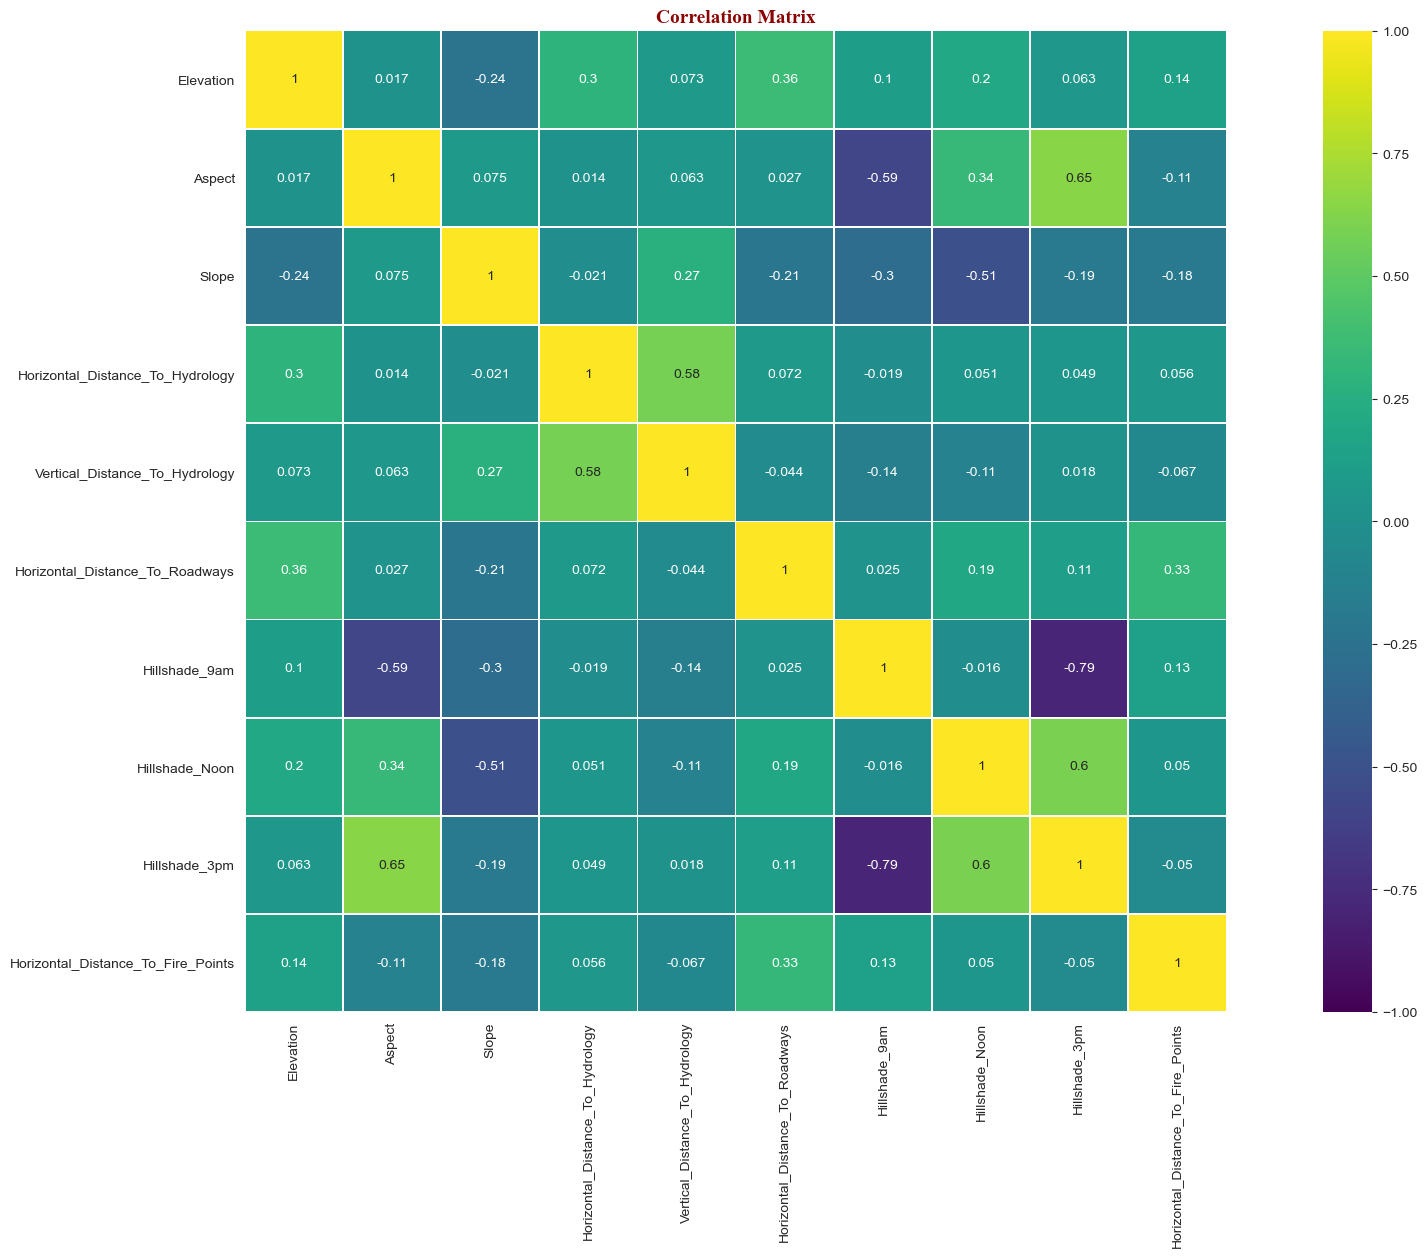

In [24]:
features_num = df_final.loc[:,'Elevation':'Horizontal_Distance_To_Fire_Points']
corr_matrix = features_num.corr()
plt.figure(figsize=(25, 13))
sns.heatmap(corr_matrix,square=True, annot=True, linewidths=.5, vmin=-1, vmax=1, cmap='viridis')
plt.title("Correlation Matrix", fontdict=font_title)
plt.show();

#### Correlation of Continious Variables with Target Variable

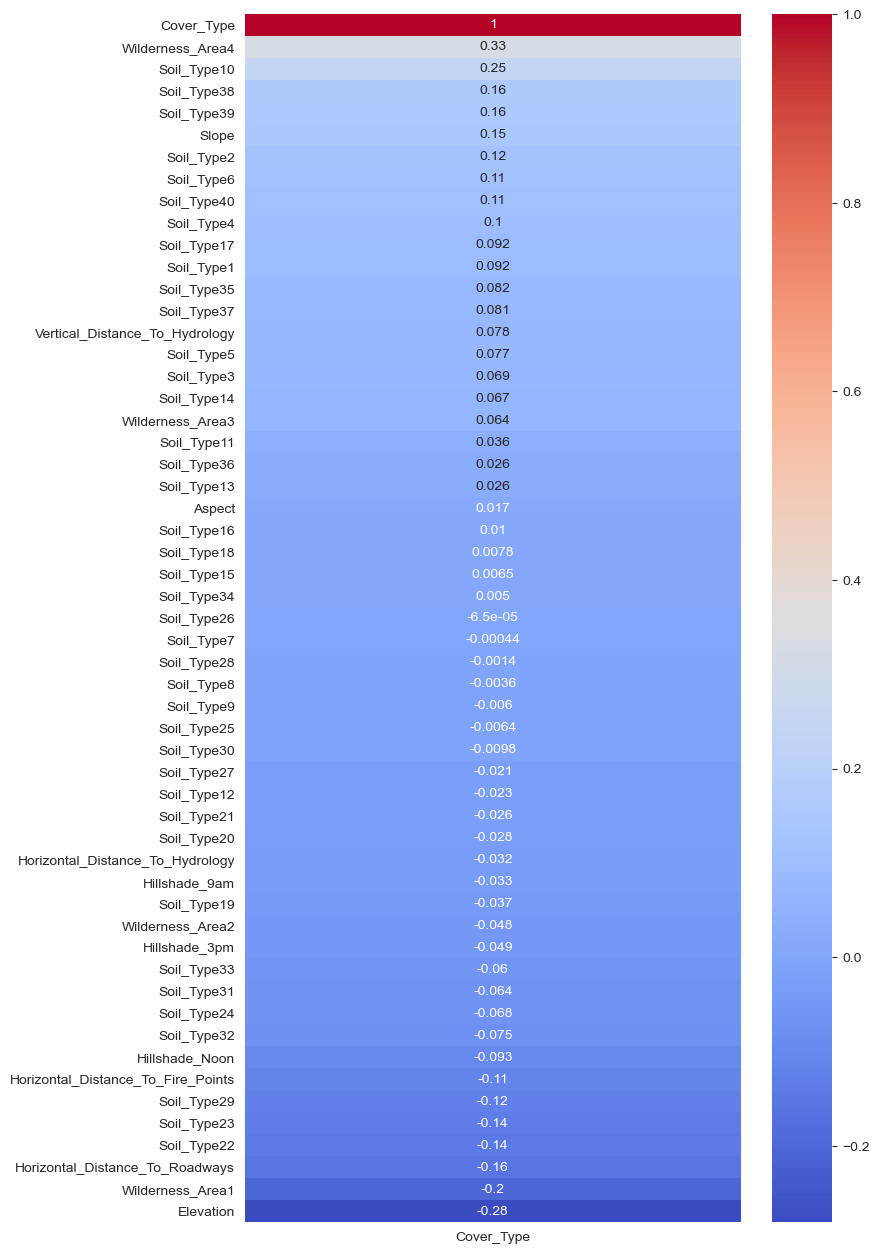

In [25]:
plt.figure(figsize=(8,16))
heatmap = df_final.corr()
sns.heatmap(heatmap[["Cover_Type"]].sort_values(by=['Cover_Type'],ascending=False), annot=True,cmap="coolwarm");

In [26]:
df_final.to_csv('covtype_cleaned.csv', index = False)

## Feature Engineering with *sqlite3* Library

Feature engineering is a process to increase the predictive success of the model. The effort put in should be worth increasing success. 

After moving the final version of data set to ***SQLite Browser*** and performing feature engineering operations in SQL, the resulting data set will be converted to dataframe format again for using in python.


In [27]:
import sqlite3

In [28]:
# Creation of the connection and importing dataframe into database.
with sqlite3.connect("tree_classification.db") as cnnct:
    df_final.to_sql("covtype_cleaned", cnnct, if_exists = "replace")

In [29]:
query1 = """SELECT *,
(Horizontal_Distance_To_Hydrology*Horizontal_Distance_To_Hydrology)+(Vertical_Distance_To_Hydrology*Vertical_Distance_To_Hydrology) as Square_Hypo_Distance,
(Hillshade_9am + Hillshade_3pm + Hillshade_Noon)/3 as Average_Hillshade,
(Horizontal_Distance_To_Hydrology + Horizontal_Distance_To_Roadways)/2 as Average_Dist_Road_Hydro, (Elevation + Vertical_Distance_To_Hydrology) /2 as Average_Elevation_Hydro
FROM covtype_cleaned;"""

In [30]:
query2 = """SELECT Elevation, Aspect, Slope, Horizontal_Distance_To_Roadways, Horizontal_Distance_To_Fire_Points, Wilderness_Area1, Wilderness_Area2, Wilderness_Area3,
Wilderness_Area4, Soil_Type1, Soil_Type2, Soil_Type3, Soil_Type4, Soil_Type5, Soil_Type6,
Soil_Type9, Soil_Type10, Soil_Type11, Soil_Type12, Soil_Type13, Soil_Type16, Soil_Type17,
Soil_Type18, Soil_Type19, Soil_Type20, Soil_Type22, Soil_Type23, Soil_Type24,
Soil_Type26, Soil_Type27, Soil_Type29, Soil_Type30, Soil_Type31, Soil_Type32, Soil_Type33,
Soil_Type34, Soil_Type35, Soil_Type38, Soil_Type39, Soil_Type40, Cover_Type,
Square_Hypo_Distance, Average_Dist_Road_Hydro, Average_Elevation_Hydro, Average_Hillshade
FROM covtype_cleaned;"""

In [31]:
with sqlite3.connect("tree_classification.db") as cnnct:
    df_q1 = pd.read_sql_query(query1, cnnct)  # transforming and exporting 
    df_q1.to_sql("covtype_cleaned", cnnct, if_exists = "replace")  # importing again to dropping columns
    df_q2 = pd.read_sql_query(query2, cnnct)  # exporting table to df_q2

In [32]:
df_q2.to_csv('covtype_after_sql.csv', index = False)

## Model Development (Multi-class Classification)

### Importing Required Libraries

In [33]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sqlalchemy import create_engine
import warnings
from IPython.core.pylabtools import figsize
from scipy.stats import zscore
from scipy import stats
from numpy import percentile
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.model_selection import cross_val_score
from statsmodels.formula.api import ols
from sklearn.model_selection import cross_val_score
from scipy.stats import zscore
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier , GradientBoostingClassifier
import seaborn as sns
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.model_selection import TimeSeriesSplit
from yellowbrick.classifier import ClassificationReport
from yellowbrick.datasets import load_occupancy
from sklearn.model_selection import KFold
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix, accuracy_score, mean_squared_error, r2_score, roc_auc_score, roc_curve, classification_report
font_title = {'family': 'times new roman', 'color': 'darkred',
              'weight': 'bold', 'size': 14}
warnings.filterwarnings('ignore')
sns.set_style("whitegrid")
plt.rcParams['figure.dpi'] = 100

In [34]:
df_tree = pd.read_csv('covtype_after_sql.csv')

In [35]:
df_tree.head()

,Elevation,Aspect,Slope,Horizontal_Distance_To_Roadways,Horizontal_Distance_To_Fire_Points,Wilderness_Area1,Wilderness_Area2,Wilderness_Area3,Wilderness_Area4,Soil_Type1,...,Soil_Type34,Soil_Type35,Soil_Type38,Soil_Type39,Soil_Type40,Cover_Type,Square_Hypo_Distance,Average_Dist_Road_Hydro,Average_Elevation_Hydro,Average_Hillshade
0,2596,51,3,510,6279,1,0,0,0,0,...,0,0,0,0,0,5,66564,384,1298,200
1,2590,56,2,390,6225,1,0,0,0,0,...,0,0,0,0,0,5,44980,301,1292,202
2,2804,139,9,3180,6121,1,0,0,0,0,...,0,0,0,0,0,2,76049,1724,1434,202
3,2785,155,18,3090,6211,1,0,0,0,0,...,0,0,0,0,0,2,72488,1666,1451,199
4,2595,45,2,391,6172,1,0,0,0,0,...,0,0,0,0,0,5,23410,272,1297,201


In [36]:
df_tree.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 572789 entries, 0 to 572788
Data columns (total 45 columns):
 #   Column                              Non-Null Count   Dtype
---  ------                              --------------   -----
 0   Elevation                           572789 non-null  int64
 1   Aspect                              572789 non-null  int64
 2   Slope                               572789 non-null  int64
 3   Horizontal_Distance_To_Roadways     572789 non-null  int64
 4   Horizontal_Distance_To_Fire_Points  572789 non-null  int64
 5   Wilderness_Area1                    572789 non-null  int64
 6   Wilderness_Area2                    572789 non-null  int64
 7   Wilderness_Area3                    572789 non-null  int64
 8   Wilderness_Area4                    572789 non-null  int64
 9   Soil_Type1                          572789 non-null  int64
 10  Soil_Type2                          572789 non-null  int64
 11  Soil_Type3                          572789 non-null 

In [37]:
X = df_tree.drop('Cover_Type', axis = 1)
y = df_tree['Cover_Type']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify = y, random_state=42)

### Standardization

In [38]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

### Decision Tree Classifier


In [39]:
dt = DecisionTreeClassifier()
dt.fit(X_train , y_train)
y_pred = dt.predict(X_test)

In [40]:
dt_cv_scores = cross_val_score(estimator=dt, X=X_train, y=y_train, cv=10)
dt_cv_accuracy_score = dt_cv_scores.mean()
dt_cv_accuracy_score

0.9364665392527197

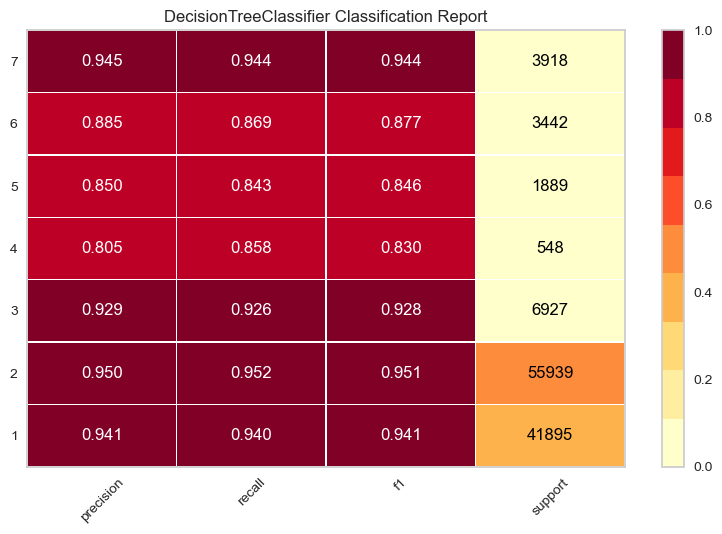

In [41]:
visualizer = ClassificationReport(dt, support=True)
visualizer.fit(X_train, y_train)       
visualizer.score(X_test, y_test)       
visualizer.show();

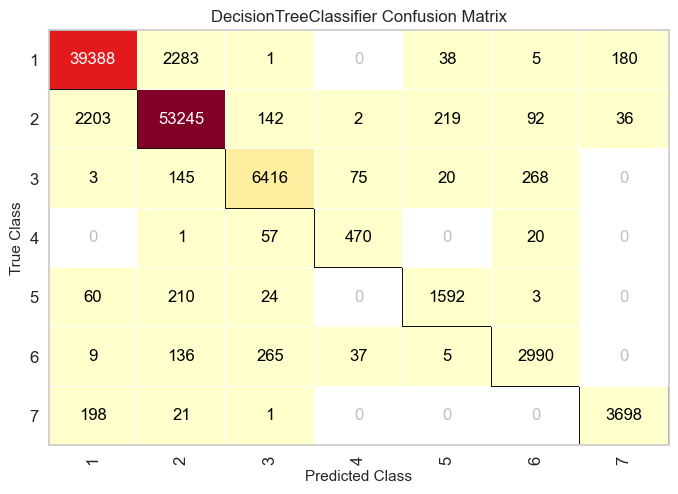

In [42]:
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split as tts
from sklearn.linear_model import LogisticRegression
from yellowbrick.classifier import ConfusionMatrix
cm = ConfusionMatrix(dt)
cm.fit(X_train, y_train)
cm.score(X_test, y_test)
cm.show();

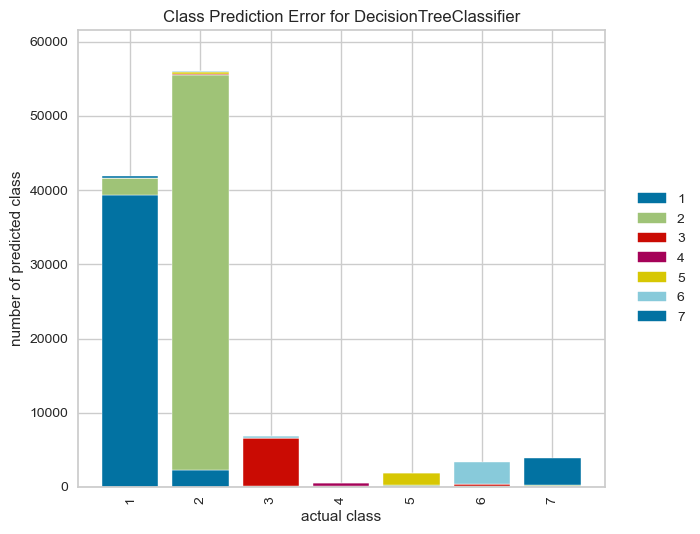

In [43]:
from yellowbrick.classifier import ClassPredictionError
visualizer = ClassPredictionError(dt)
visualizer.fit(X_train, y_train) 
visualizer.score(X_test, y_test) 
visualizer.show();

### Random Forest Classifier


In [44]:
rf = RandomForestClassifier()
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)

In [45]:
rf_cv_scores = cross_val_score(estimator=rf, X=X_train, y=y_train, cv=10)
rf_cv_accuracy_score = rf_cv_scores.mean()
rf_cv_accuracy_score

0.9630863032264999

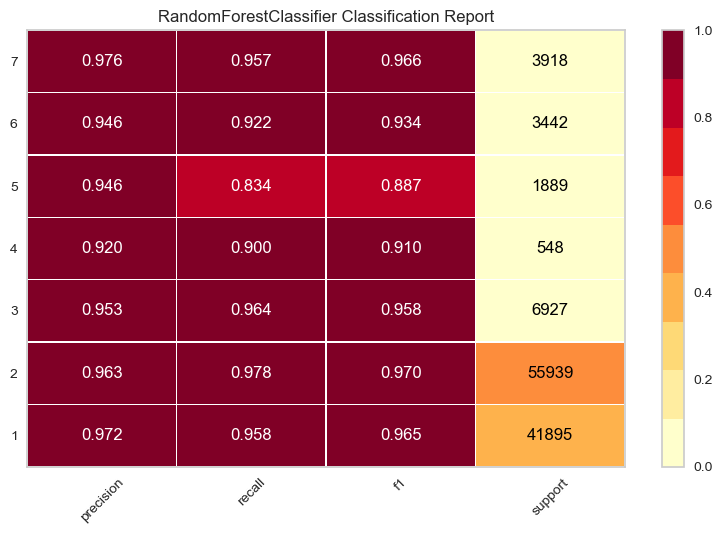

In [46]:
visualizer = ClassificationReport(rf, support=True)
visualizer.fit(X_train, y_train)       
visualizer.score(X_test, y_test)        
visualizer.show();

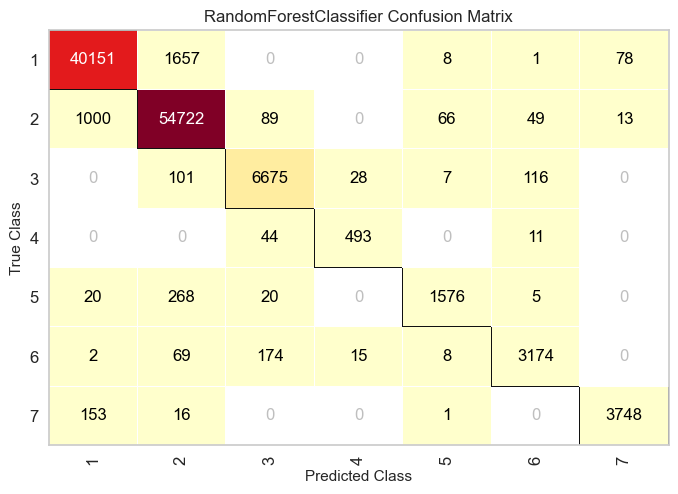

In [47]:
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split as tts
from sklearn.linear_model import LogisticRegression
from yellowbrick.classifier import ConfusionMatrix
cm = ConfusionMatrix(rf)
cm.fit(X_train, y_train)
cm.score(X_test, y_test)
cm.show();

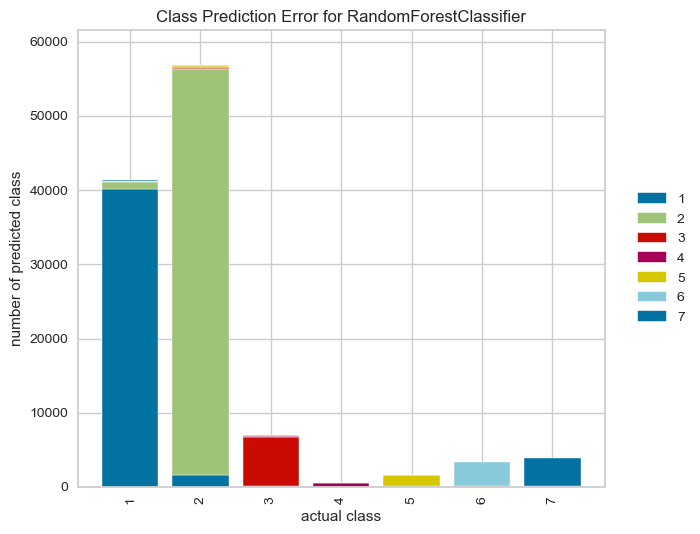

In [48]:
from yellowbrick.classifier import ClassPredictionError
visualizer = ClassPredictionError(rf) 
visualizer.fit(X_train, y_train) 
visualizer.score(X_test, y_test) 
visualizer.show();

### XGBoost Classifer


In [49]:
xgb = XGBClassifier()
xgb.fit(X_train , y_train)
y_pred = xgb.predict(X_test)

In [50]:
xgb_cv_scores = cross_val_score(estimator=xgb, X=X_train, y=y_train, cv=10)
xgb_cv_accuracy_score = xgb_cv_scores.mean()
xgb_cv_accuracy_score

0.8714862133715542

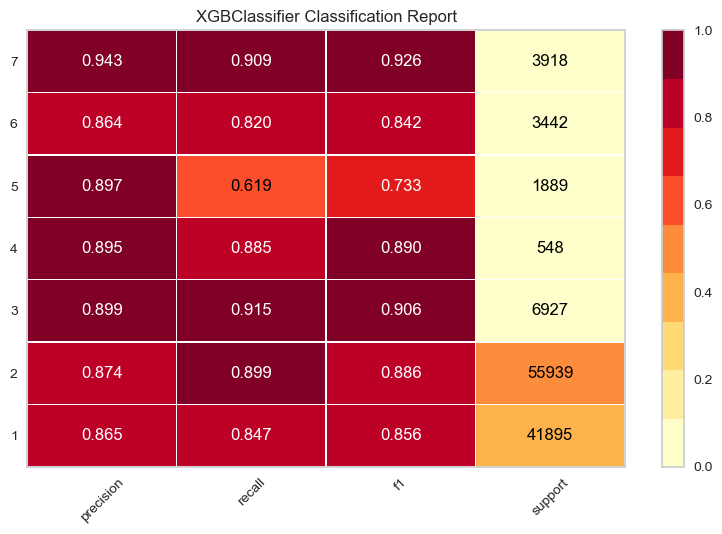

In [51]:
from sklearn.model_selection import TimeSeriesSplit
from sklearn.naive_bayes import GaussianNB
from yellowbrick.classifier import ClassificationReport
visualizer = ClassificationReport(xgb, support=True)
visualizer.fit(X_train, y_train)       
visualizer.score(X_test, y_test)        
visualizer.show();

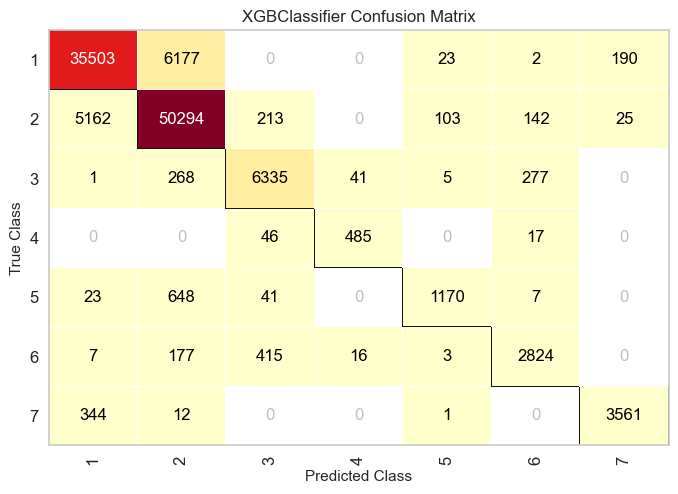

In [52]:
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split as tts
from sklearn.linear_model import LogisticRegression
from yellowbrick.classifier import ConfusionMatrix
cm = ConfusionMatrix(xgb)
cm.fit(X_train, y_train)
cm.score(X_test, y_test)
cm.show();

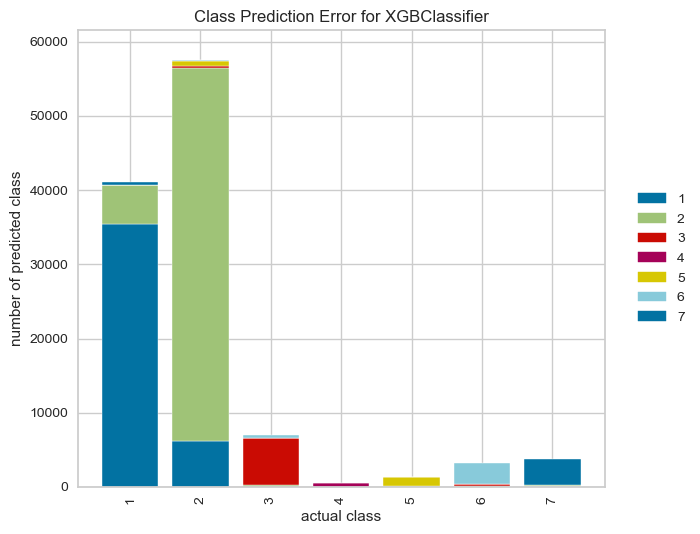

In [53]:
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from yellowbrick.classifier import ClassPredictionError
visualizer = ClassPredictionError(xgb)
visualizer.fit(X_train, y_train)
visualizer.score(X_test, y_test)
visualizer.show();

### LightGBM Classifier

In [54]:
import lightgbm as lgb
lgbm = lgb.LGBMClassifier()
lgbm.fit(X_train, y_train)
y_pred = lgbm.predict(X_test)

In [55]:
lgbm_cv_scores = cross_val_score(estimator=lgbm, X=X_train, y=y_train, cv=10)
lgbm_cv_accuracy_score = lgbm_cv_scores.mean()
lgbm_cv_accuracy_score

0.8511340393684644

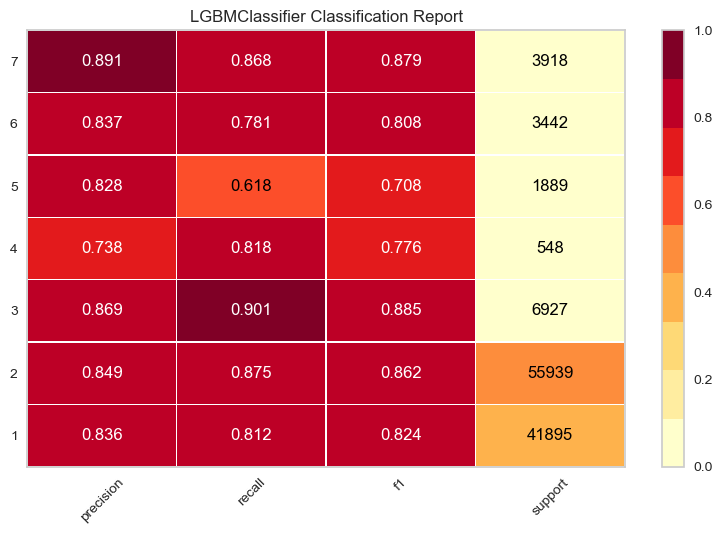

In [56]:
from sklearn.model_selection import TimeSeriesSplit
from sklearn.naive_bayes import GaussianNB
from yellowbrick.classifier import ClassificationReport
visualizer = ClassificationReport(lgbm, support=True)
visualizer.fit(X_train, y_train)        
visualizer.score(X_test, y_test)        
visualizer.show();

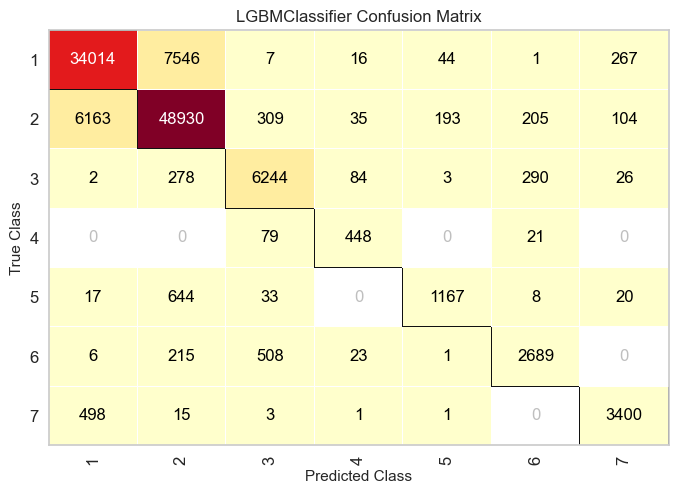

In [57]:
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split as tts
from sklearn.linear_model import LogisticRegression
from yellowbrick.classifier import ConfusionMatrix
cm = ConfusionMatrix(lgbm)
cm.fit(X_train, y_train)
cm.score(X_test, y_test)
cm.show();

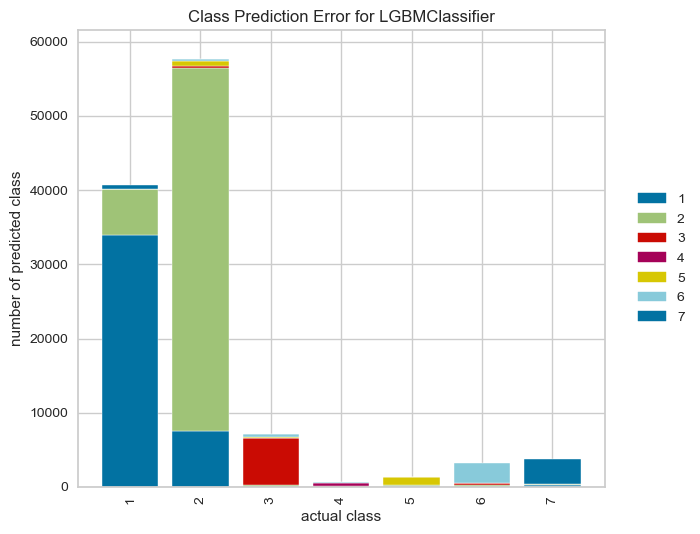

In [58]:
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from yellowbrick.classifier import ClassPredictionError
visualizer = ClassPredictionError(lgbm)
visualizer.fit(X_train, y_train)
visualizer.score(X_test, y_test)
visualizer.show();

### Model Comparison

We have created a multi-classifier model with 4 different algorithms and made predictions. Now, it is time to observe the performance of our models together 

**Cross Validated Accuracy Scores**

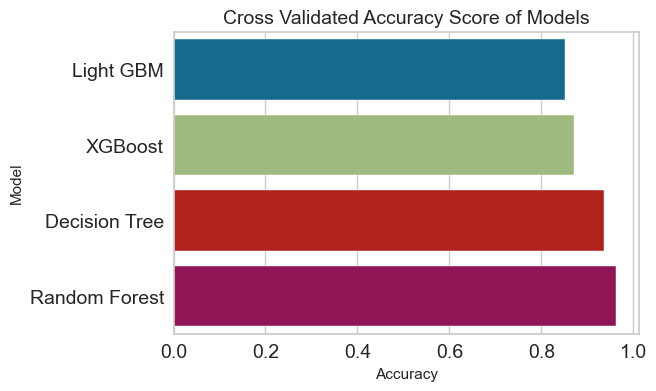

In [61]:
compare = pd.DataFrame({"Model": ["Decision Tree", "Random Forest", "XGBoost", "Light GBM"],
                        "Accuracy": [dt_cv_accuracy_score, rf_cv_accuracy_score, xgb_cv_accuracy_score, lgbm_cv_accuracy_score]})
compare = compare.sort_values(by="Accuracy", ascending=True)
plt.figure(figsize=(6,4))
ax = sns.barplot(x="Accuracy", y="Model", data=compare)
plt.yticks(size = 14)
plt.xticks(size = 14)
plt.title("Cross Validated Accuracy Score of Models", size=14);

___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___